## Image segmentation

Make sure you look at the [Read_and_process_images.ipynb](Read_and_process_images.ipynb) notebook first.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## `scikit-image` — Image segmentation

We'll load the luminance data we made before.

**If this throws an error, you probably need to go back to that notebook to create the file.**

In [6]:
y = np.load("../data/quartz-arenite_LUMINANCE_Michael-C-Rygel_CC-BY-SA.npy")

FileNotFoundError: [Errno 2] No such file or directory: '../../data/quartz-arenite_LUMINANCE_Michael-C-Rygel_CC-BY-SA.npy'

In [3]:
plt.imshow(y)
plt.colorbar()

NameError: name 'y' is not defined

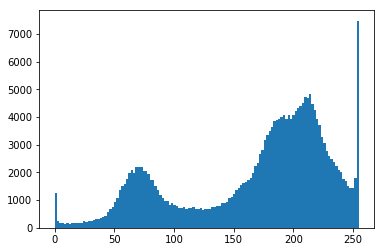

In [5]:
_ = plt.hist(y.ravel(), bins=128)

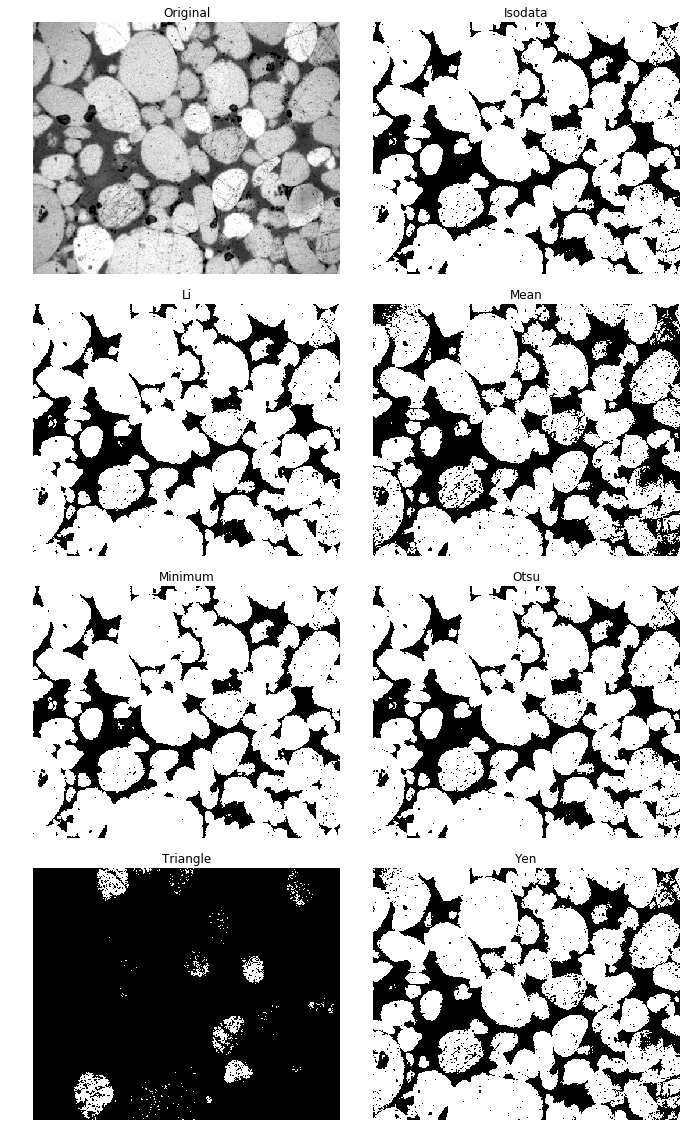

In [6]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(y, figsize=(10, 16), verbose=False)
plt.show()

In [7]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(y)
binary = y > thresh

In [20]:
# A quick aside.
phi = 1 - binary.sum() / binary.size
print(f'porosity = {phi:.1%}')

porosity = 25.9%


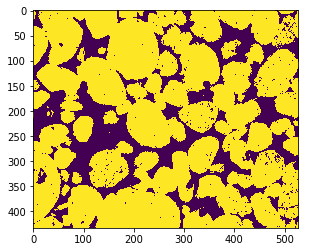

In [12]:
plt.imshow(binary)

In [13]:
from skimage.morphology import closing, opening, square
binary = closing(binary, square(3))
binary = opening(binary, square(3))

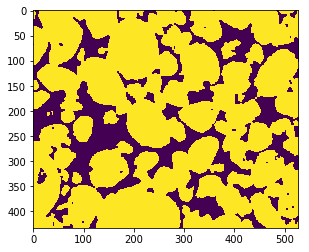

In [9]:
plt.imshow(binary)

In [10]:
from skimage.morphology import watershed
from skimage.feature import peak_local_max
import scipy.ndimage

distance = scipy.ndimage.distance_transform_edt(binary)
local_maxi = peak_local_max(distance, labels=binary, indices=False, footprint=square(7))
markers, n = scipy.ndimage.label(local_maxi)
labels = watershed(-distance, markers, mask=binary)

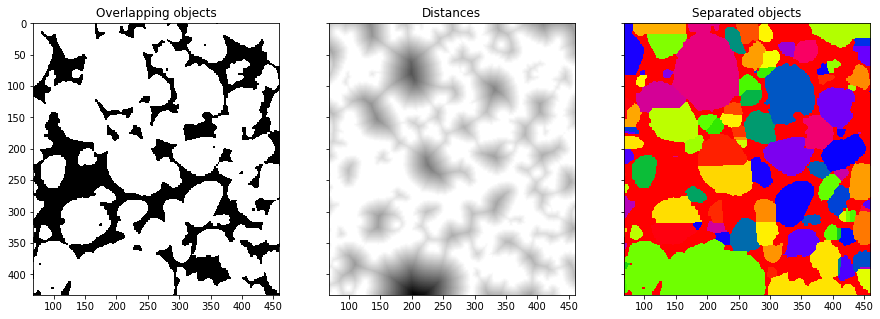

In [11]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5), sharey=True)

axes[0].imshow(binary, cmap='gray', interpolation='nearest')
axes[0].set_title('Overlapping objects')
axes[1].imshow(-distance, cmap='gray', interpolation='nearest')
axes[1].set_title('Distances')
axes[2].imshow(labels, cmap="prism", interpolation='nearest')
axes[2].set_title('Separated objects')

plt.show()

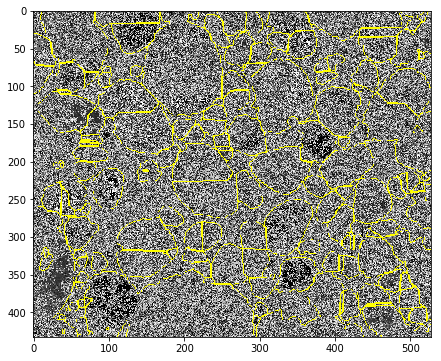

In [12]:
from skimage.segmentation import mark_boundaries

plt.figure(figsize=(12, 6))
plt.imshow(mark_boundaries(y, labels))

The labeller returned the number of segments: 

In [13]:
n

140

### Exercise

- Try changing some of the parameters (the thresholding algorithm, the binary operations, the footprint), to see if you can improve the segmentation.
- Find another photograph to work on; see if you can segment it.

## Automatic methods

A quick look at some of `skimage`'s automated segmenters, from [this blog post](http://melvincabatuan.github.io/SLIC-Superpixels/). 

In [14]:
import skimage.io

img = skimage.io.imread("../data/quartz-arenite_CROPPED_Michael-C-Rygel_CC-BY-SA.png")

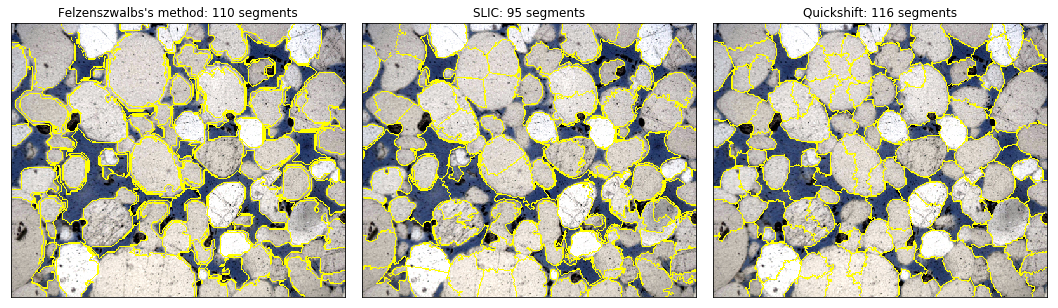

In [15]:
from skimage.segmentation import felzenszwalb, slic, quickshift

segments_fz = felzenszwalb(img, scale=100, sigma=2, min_size=500)
segments_slic = slic(img, n_segments=150, compactness=10, sigma=1)
segments_quick = quickshift(img, kernel_size=5, max_dist=50, ratio=0.25)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16, 8, forward=True)
fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.05, 0.05)

ax[0].imshow(mark_boundaries(img, segments_fz))
ax[0].set_title("Felzenszwalbs's method: {} segments".format(len(np.unique(segments_fz))))
ax[1].imshow(mark_boundaries(img, segments_slic))
ax[1].set_title("SLIC: {} segments".format(len(np.unique(segments_slic))))
ax[2].imshow(mark_boundaries(img, segments_quick))
ax[2].set_title("Quickshift: {} segments".format(len(np.unique(segments_quick))))
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()
